In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neural_network as nn
from sklearn.metrics import confusion_matrix, accuracy_score
%matplotlib inline

In [199]:
rus_letters = pd.read_csv("русский_пиксельный_алфавит.csv")

In [200]:
rus_vovels = rus_letters[rus_letters.value.isin(['А','Е','И','О','У','Ы','Э','Ю','Я'])].drop("value", axis = 1)

In [201]:
vals = rus_letters["value"]
rus_letters = rus_letters.drop("value", axis = 1)

In [170]:
def plotchar(i):
    (plt.imshow(i.reshape(7, 5)))

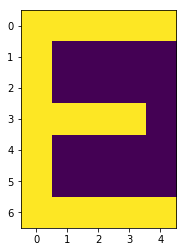

In [171]:
plotchar(rus_vovels.values[1])

In [179]:
train = rus_letters.values
target = np.eye(32)
clf = nn.MLPClassifier(hidden_layer_sizes=(10,),
                    activation='logistic',
                    max_iter=500000,
                    alpha=1e-4,
                    solver='sgd',
                    tol=1e-2,
                    random_state=1,
                    learning_rate_init=.1,
                    n_iter_no_change=10000)
clf.fit(train, target)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=500000, momentum=0.9,
       n_iter_no_change=10000, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='sgd', tol=0.01,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [173]:
clf.predict(train)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

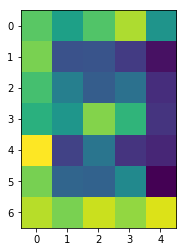

In [174]:
err = 0.3
noise_train = train+np.random.normal(0, err, train.shape)
plotchar(noise_train[5,:])

In [311]:
def max_err(nn, train, err):
    c = np.zeros((32,32))
    for i in range(1000):
        c += confusion_matrix(target.argmax(axis=1), nn.predict(train + np.random.normal(0, err, train.shape)).argmax(axis=1))
    return 1-np.max(np.diag(c))/1000.0

In [312]:
max_err(clf, train, 0.2)

0.0010000000000000009

In [ ]:
np.savetxt('answer.csv', c, delimiter=',', fmt='%d')

In [259]:
clf3 = nn.MLPClassifier(hidden_layer_sizes=(20,20),
                    activation='logistic',
                    max_iter=500000,
                    alpha=1e-4,
                    solver='sgd',
                    tol=1e-2,
                    random_state=1,
                    learning_rate_init=.1,
                    n_iter_no_change=10000)
clf3.fit(train, target)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20), learning_rate='constant',
       learning_rate_init=0.1, max_iter=500000, momentum=0.9,
       n_iter_no_change=10000, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='sgd', tol=0.01,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [287]:
clf3.predict(train+ np.random.normal(0, err, train.shape))

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [300]:
c1 = np.zeros((32,32))
ar1 = 0

In [301]:
for i in range(100):
    c1 += confusion_matrix(target.argmax(axis=1), clf3.predict(train + np.random.normal(0, err, train.shape)).argmax(axis=1))
ar1+=100
c1 /= ar1

In [302]:
np.savetxt('answer1.csv', c1, delimiter=',', fmt='%f')

In [318]:
clf1err = []
clf2err = []
terr = np.arange(0,0.5,0.05)
for i in terr:
    clf1err.append(max_err(clf, train, i))
    clf2err.append(max_err(clf3, train, i))    

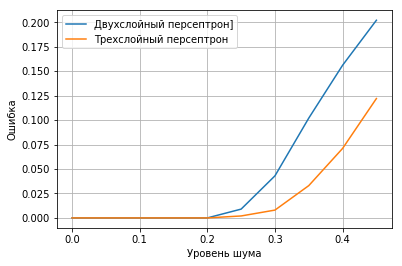

In [328]:
plt.plot(terr, clf1err)
plt.plot(terr, clf2err)
plt.grid()
plt.xlabel('Уровень шума')
plt.ylabel('Ошибка')
plt.legend(['Двухслойный персептрон]','Трехслойный персептрон'])
plt.show()